In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
def clean(path='Life Expectancy Data.csv'):

    df = pd.read_csv(path)

    df.info()

    # 统计缺失值信息
    missing_info = df.isnull().sum()

    # 打印结果
    print("缺失值统计：")
    print(missing_info)

    # 去除缺失Life expectancy的列
    df = df.dropna(subset=['Life expectancy'])

    # 使用相同国家类型的众数填充缺失的GDP值
    df['GDP'] = df.groupby('Status')['GDP'].transform(lambda x: x.fillna(x.mode()))

    # 使用相同国家类型的众数填充缺失的GDP值
    df['Population'] = df.groupby('Status')['Population'].transform(lambda x: x.fillna(x.mode()))

    # 选择只包含数值列的子集，然后使用中位数填充
    numeric_cols = df.select_dtypes(include='number').columns
    df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].median())

    # 统计缺失值信息
    missing_info = df.isnull().sum()

    # 打印结果
    print("清理完成后缺失值统计：")
    print(missing_info)

    # 打印结果
    pd.set_option('display.max_columns', None)
    pd.set_option('display.expand_frame_repr', False)

    # print(df.describe())

    return df

In [3]:
def kde(df):
    # 使用Seaborn绘制Life expectancy的KDE分布图
    column_to_plot = 'Life expectancy'

    sns.kdeplot(data=df[column_to_plot], fill=True, color='skyblue')

    # 添加标题和标签
    plt.title(f'KDE distribution - {column_to_plot}')
    plt.xlabel(column_to_plot)
    plt.ylabel('Density')

    # 显示图形
    plt.show()
    
    
def corr(df):

    # 计算所有特征之间的皮尔森相关系数
    correlation_matrix = df.corr()

    # 使用 Seaborn 绘制热力图
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)

    # 添加标题
    plt.title('Characteristic Pearson correlation coefficient heatmap')

    # 显示图形
    plt.show()
    
    
def demonstrate(df, feature):
    # 特定feature与Life expectancy的关系
    sns.histplot(df[feature], bins=20)  # 假设feature是你要查看的特征
    plt.show()

    sns.kdeplot(df[feature])
    plt.show()

    sns.boxplot(x=feature, data=df)
    plt.show()

    sns.scatterplot(x=feature, y='Life expectancy', data=df)
    plt.show()

In [4]:
df = clean()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10  BMI                              2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

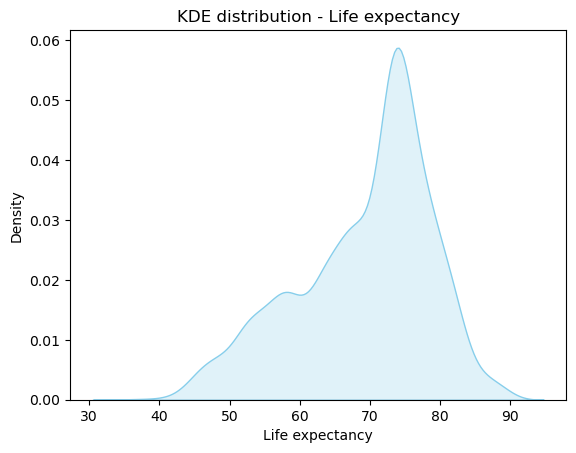

In [5]:
kde(df)

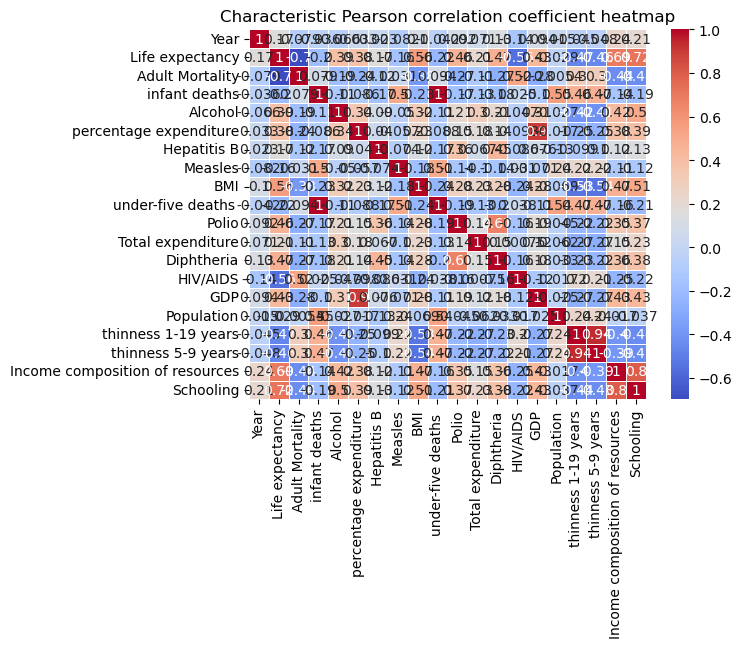

In [6]:
corr(df)

In [7]:
df = clean()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10  BMI                              2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from lightgbm import LGBMRegressor, LGBMClassifier
from lightgbm import plot_importance
from sklearn.svm import NuSVR
from sklearn.metrics import mean_squared_error, accuracy_score, f1_score
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler, MinMaxScaler
from sklearn.linear_model import LinearRegression, ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split

In [9]:
def lr(df):

    y = df['Life expectancy']

    # 创建包含剩余数据的新DataFrame
    X = df.drop('Life expectancy', axis=1)

    X['Country'] = LabelEncoder().fit_transform(X['Country'])
    X['Status'] = LabelEncoder().fit_transform(X['Status'])
    X['Year'] = OneHotEncoder().fit_transform(X['Year'].values.reshape(-1, 1)).toarray()

    # 划分训练集和测试集
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # 标准化
    X_scaler = StandardScaler()
    X_train = X_scaler.fit_transform(X_train)
    X_test = X_scaler.transform(X_test)

    Y_scaler = StandardScaler()
    y_train = Y_scaler.fit_transform(np.array(y_train).reshape(-1, 1))
    y_test = Y_scaler.transform(np.array(y_test).reshape(-1, 1))

    # 使用线性回归模型
    model = LinearRegression()
    model.fit(X_train, y_train)

    # 打印模型的系数和截距
    print("模型的斜率 (theta_1):", model.coef_[0])
    print("模型的截距 (theta_0):", model.intercept_)

    # 在训练集上进行预测
    y_train_pred = model.predict(X_train)
    # 在测试集上进行预测
    y_test_pred = model.predict(X_test)

    # 还原数据
    y_train = Y_scaler.inverse_transform(y_train)
    y_test = Y_scaler.inverse_transform(y_test)
    y_train_pred = Y_scaler.inverse_transform(y_train_pred)
    y_test_pred = Y_scaler.inverse_transform(y_test_pred)

    # 计算均方误差
    mse_train = mean_squared_error(y_train, y_train_pred)
    mse_test = mean_squared_error(y_test, y_test_pred)

    # 打印均方误差
    print("训练集均方误差:", mse_train)
    print("测试集均方误差:", mse_test)

    # 绘制散点图
    plt.scatter(y_test, y_test_pred, color='blue', label=f'MSE: {mse_test:.2f}', s=10)

    # 添加拟合线
    plt.plot([min(y_test), max(y_test)], [min(y_test_pred), max(y_test_pred)], linestyle='--', color='red', linewidth=2,
             label='Perfect Prediction')

    # 添加标签和标题
    plt.xlabel('Actual Age')
    plt.ylabel('Predicted Age')
    plt.title('Linear regression')

    # 显示图例
    plt.legend()
    # 显示图形
    plt.show()

    return model, X_train, X_test


def Elastic(df):

    y = df['Life expectancy']

    # 创建包含剩余数据的新DataFrame
    X = df.drop('Life expectancy', axis=1)

    X['Country'] = LabelEncoder().fit_transform(X['Country'])
    X['Status'] = LabelEncoder().fit_transform(X['Status'])
    X['Year'] = OneHotEncoder().fit_transform(X['Year'].values.reshape(-1, 1)).toarray()

    # 划分训练集和测试集
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # 标准化
    X_scaler = StandardScaler()
    X_train = X_scaler.fit_transform(X_train)
    X_test = X_scaler.transform(X_test)

    Y_scaler = StandardScaler()
    y_train = Y_scaler.fit_transform(np.array(y_train).reshape(-1, 1))
    y_test = Y_scaler.transform(np.array(y_test).reshape(-1, 1))

    # 4. 模型训练
    alpha_value = 0.01  # 正则化项的强度
    l1_ratio_value = 0.5  # L1 正则化的比例，范围在 0 到 1 之间
    model = ElasticNet(alpha=alpha_value, l1_ratio=l1_ratio_value)
    model.fit(X_train, y_train)

    # 在训练集上进行预测
    y_train_pred = model.predict(X_train)
    # 在测试集上进行预测
    y_test_pred = model.predict(X_test)

    # 还原数据
    y_train = Y_scaler.inverse_transform(np.array(y_train).reshape(-1, 1))
    y_test = Y_scaler.inverse_transform(np.array(y_test).reshape(-1, 1))
    y_train_pred = Y_scaler.inverse_transform(np.array(y_train_pred).reshape(-1, 1))
    y_test_pred = Y_scaler.inverse_transform(np.array(y_test_pred).reshape(-1, 1))

    # 计算均方误差
    mse_train = mean_squared_error(y_train, y_train_pred)
    mse_test = mean_squared_error(y_test, y_test_pred)

    # 打印均方误差
    print("训练集均方误差:", mse_train)
    print("测试集均方误差:", mse_test)

    # 绘制散点图
    plt.scatter(y_test, y_test_pred, color='blue', label=f'MSE: {mse_test:.2f}', s=10)

    # 添加拟合线
    plt.plot([min(y_test), max(y_test)], [min(y_test_pred), max(y_test_pred)], linestyle='--', color='red', linewidth=2,
             label='Perfect Prediction')

    # 添加标签和标题
    plt.xlabel('Actual Age')
    plt.ylabel('Predicted Age')
    plt.title('ElasticNet')

    # 显示图例
    plt.legend()
    # 显示图形
    plt.show()

    return model, X_train, X_test


def KNN(df):
    y = df['Life expectancy']

    # 创建包含剩余数据的新DataFrame
    X = df.drop('Life expectancy', axis=1)

    X['Country'] = LabelEncoder().fit_transform(X['Country'])
    X['Status'] = LabelEncoder().fit_transform(X['Status'])
    X['Year'] = OneHotEncoder().fit_transform(X['Year'].values.reshape(-1, 1)).toarray()

    # 划分训练集和测试集
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # 标准化
    X_scaler = MinMaxScaler()
    X_train = X_scaler.fit_transform(X_train)
    X_test = X_scaler.transform(X_test)

    Y_scaler = MinMaxScaler()
    y_train = Y_scaler.fit_transform(np.array(y_train).reshape(-1, 1))
    y_test = Y_scaler.transform(np.array(y_test).reshape(-1, 1))

    # 创建 KNN 回归模型
    k_neighbors = 10  # K 的值，即邻居的数量
    model = KNeighborsRegressor(n_neighbors=k_neighbors)
    # 训练模型
    model.fit(X_train, y_train)

    # 在训练集上进行预测
    y_train_pred = model.predict(X_train)
    # 在测试集上进行预测
    y_test_pred = model.predict(X_test)

    # 还原数据
    y_train = Y_scaler.inverse_transform(np.array(y_train).reshape(-1, 1))
    y_test = Y_scaler.inverse_transform(np.array(y_test).reshape(-1, 1))
    y_train_pred = Y_scaler.inverse_transform(np.array(y_train_pred).reshape(-1, 1))
    y_test_pred = Y_scaler.inverse_transform(np.array(y_test_pred).reshape(-1, 1))

    # 计算均方误差
    mse_train = mean_squared_error(y_train, y_train_pred)
    mse_test = mean_squared_error(y_test, y_test_pred)

    # 打印均方误差
    print("训练集均方误差:", mse_train)
    print("测试集均方误差:", mse_test)

    # 绘制散点图
    plt.scatter(y_test, y_test_pred, color='blue', label=f'MSE: {mse_test:.2f}', s=10)

    # 添加拟合线
    plt.plot([min(y_test), max(y_test)], [min(y_test_pred), max(y_test_pred)], linestyle='--', color='red', linewidth=2,
             label='Perfect Prediction')

    # 添加标签和标题
    plt.xlabel('Actual Age')
    plt.ylabel('Predicted Age')
    plt.title('KNN')

    # 显示图例
    plt.legend()
    # 显示图形
    plt.show()

    return model, X_train, X_test


def SVM(df):

    y = df['Life expectancy']

    # 创建包含剩余数据的新DataFrame
    X = df.drop('Life expectancy', axis=1)

    X['Country'] = LabelEncoder().fit_transform(X['Country'])
    X['Status'] = LabelEncoder().fit_transform(X['Status'])
    X['Year'] = OneHotEncoder().fit_transform(X['Year'].values.reshape(-1, 1)).toarray()

    # 划分训练集和测试集
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # 标准化
    X_scaler = StandardScaler()
    X_train = X_scaler.fit_transform(X_train)
    X_test = X_scaler.transform(X_test)

    Y_scaler = StandardScaler()
    y_train = Y_scaler.fit_transform(np.array(y_train).reshape(-1, 1))
    y_test = Y_scaler.transform(np.array(y_test).reshape(-1, 1))

    # 创建 NuSVR 模型
    nu_value = 0.5  # Nu 的值，范围在 0 到 1 之间
    model = NuSVR(nu=nu_value)
    model.fit(X_train, y_train)

    # 在训练集上进行预测
    y_train_pred = model.predict(X_train)
    # 在测试集上进行预测
    y_test_pred = model.predict(X_test)

    # 还原数据
    y_train = Y_scaler.inverse_transform(np.array(y_train).reshape(-1, 1))
    y_test = Y_scaler.inverse_transform(np.array(y_test).reshape(-1, 1))
    y_train_pred = Y_scaler.inverse_transform(np.array(y_train_pred).reshape(-1, 1))
    y_test_pred = Y_scaler.inverse_transform(np.array(y_test_pred).reshape(-1, 1))

    # 计算均方误差
    mse_train = mean_squared_error(y_train, y_train_pred)
    mse_test = mean_squared_error(y_test, y_test_pred)

    # 打印均方误差
    print("训练集均方误差:", mse_train)
    print("测试集均方误差:", mse_test)

    # 绘制散点图
    plt.scatter(y_test, y_test_pred, color='blue', label=f'MSE: {mse_test:.2f}', s=10)

    # 添加拟合线
    plt.plot([min(y_test), max(y_test)], [min(y_test_pred), max(y_test_pred)], linestyle='--', color='red', linewidth=2,
             label='Perfect Prediction')

    # 添加标签和标题
    plt.xlabel('Actual Age')
    plt.ylabel('Predicted Age')
    plt.title('SVM')

    # 显示图例
    plt.legend()
    # 显示图形
    plt.show()

    return model, X_train, X_test


def lgbm(df):

    y = df['Life expectancy']

    # 创建包含剩余数据的新DataFrame
    X = df.drop('Life expectancy', axis=1)

    if 'Country' in X.columns.tolist():
        X['Country'] = LabelEncoder().fit_transform(X['Country'])
    if 'Status' in X.columns.tolist():
        X['Status'] = LabelEncoder().fit_transform(X['Status'])

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    model = LGBMRegressor(
        num_leaves=31,
        max_depth=6,
        learning_rate=0.01,
        n_estimators=10000,  # 使用多少个弱分类器
        objective='regression',
        boosting_type='gbdt',
        min_child_weight=2,
        min_child_samples=100,
        subsample=0.8,
        colsample_bytree=0.8,
        reg_alpha=0,
        reg_lambda=1,
        bagging_fraction=0.9,
        feature_fraction=0.6,
        bagging_freq=5,
        seed=111  # 随机数种子
    )

    model.fit(X_train, y_train, eval_set=[(X_test, y_test)], verbose=100, early_stopping_rounds=200)

    # 对测试集进行预测
    y_pred = model.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    print('mean squared error:', mse)

    # 显示重要特征
    plot_importance(model)
    plt.show()

    # 绘制散点图
    plt.scatter(y_test, y_pred, color='blue', label=f'MSE: {mse:.2f}', s=10)

    # 添加拟合线
    plt.plot([min(y_test), max(y_test)], [min(y_pred), max(y_pred)], linestyle='--', color='red', linewidth=2,
             label='Perfect Prediction')

    # 添加标签和标题
    plt.xlabel('Actual Age')
    plt.ylabel('Predicted Age')
    plt.title('LGBMRegressor')

    # 显示图例
    plt.legend()
    # 显示图形
    plt.show()

    return model, X_train, X_test

In [10]:
def Adversarial_Validation(df, ratio=0.2):  # lgbm version
    # 对抗验证
    num_zeros = int(ratio * len(df))
    num_ones = len(df) - num_zeros
    # 生成包含 20% 0 和 80% 1 的数组
    data = np.concatenate([np.zeros(num_zeros), np.ones(num_ones)])

    # 打乱数组的顺序
    np.random.shuffle(data)

    # 将生成的数组添加为新的列
    df['New_Column'] = data

    y = df['New_Column']

    # 创建包含剩余数据的新DataFrame
    X = df.drop('Life expectancy', axis=1)
    X = X.drop('New_Column', axis=1)

    X['Country'] = LabelEncoder().fit_transform(X['Country'])
    X['Status'] = LabelEncoder().fit_transform(X['Status'])

    if 'Country' in X.columns.tolist():
        X['Country'] = LabelEncoder().fit_transform(X['Country'])
    if 'Status' in X.columns.tolist():
        X['Status'] = LabelEncoder().fit_transform(X['Status'])

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=ratio, random_state=42)

    model = LGBMClassifier(
        num_leaves=31,
        max_depth=6,
        learning_rate=0.1,
        metric='binary_logloss',
        n_estimators=1000,  # 使用多少个弱分类器
        objective='binary',
        num_class=1,
        boosting_type='gbdt',
        min_child_weight=2,
        min_child_samples=100,
        subsample=0.8,
        colsample_bytree=0.8,
        reg_alpha=0,
        reg_lambda=1,
        bagging_fraction=0.9,
        feature_fraction=0.6,
        bagging_freq=5,
        # seed=1024  # 随机数种子
    )

    model.fit(X_train, y_train, eval_set=[(X_test, y_test)], verbose=100, early_stopping_rounds=50)

    # 对测试集进行预测
    y_pred = model.predict(X_test)

    # 计算准确率
    accuracy = accuracy_score(y_test, y_pred)
    print('accuracy:%8.f%%' % (accuracy * 100))

    # f1分数
    f1 = f1_score(y_test, y_pred, average='macro')
    print('f1_score:', f1)

    # 显示重要特征
    plot_importance(model)
    plt.show()

模型的斜率 (theta_1): [ 0.0218409   0.02848392 -0.0530638  -0.2646022   1.17989877  0.03334231
  0.01304056 -0.04089914 -0.03608939  0.08538391 -1.19567464  0.07284332
  0.0120661   0.10371447 -0.26108621  0.05786532 -0.0056481  -0.04085844
 -0.00120591  0.11601261  0.22428701]
模型的截距 (theta_0): [-3.52349637e-16]
训练集均方误差: 16.3683439402581
测试集均方误差: 15.597848979369928


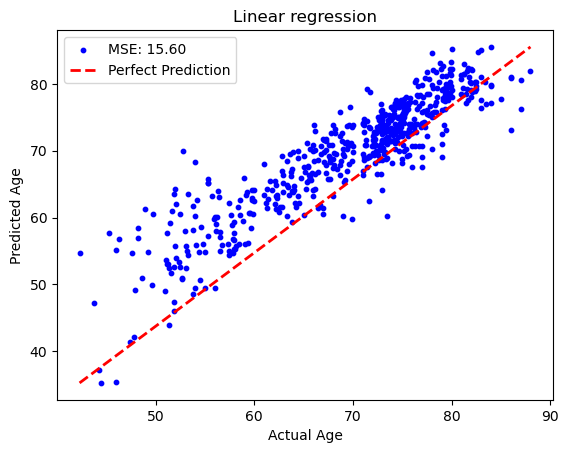

In [11]:
linear, X_train, X_test = lr(df)

训练集均方误差: 17.159203971328125
测试集均方误差: 16.425480309102845


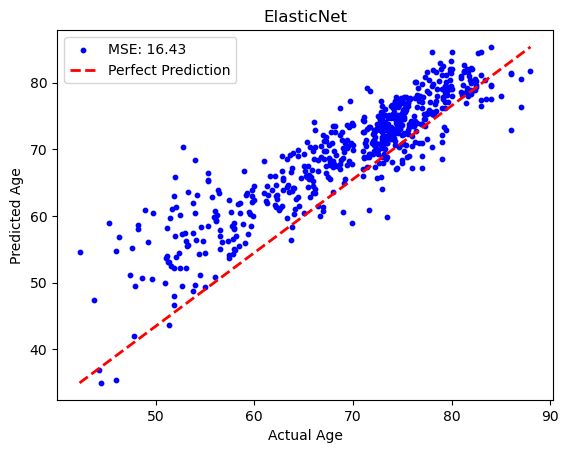

In [12]:
ela, X_train, X_test = Elastic(df)

训练集均方误差: 9.934757557643042
测试集均方误差: 12.33217986348123


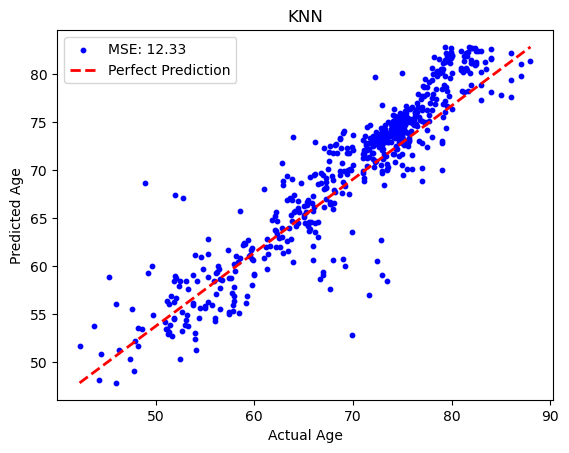

In [13]:
knn, X_train, X_test = KNN(df)

D:\Anaconda3\envs\pytorch\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


训练集均方误差: 4.542537400655969
测试集均方误差: 7.501856624853333


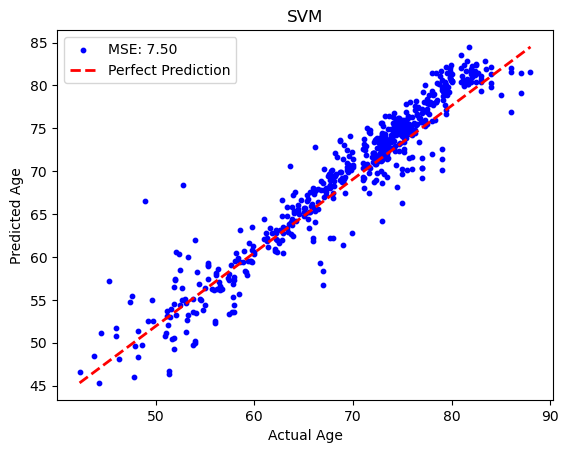

In [14]:
svm, X_train, X_test = SVM(df)

[LightGBM] [Warning] feature_fraction is set=0.6, colsample_bytree=0.8 will be ignored. Current value: feature_fraction=0.6
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=0.8 will be ignored. Current value: bagging_fraction=0.9
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
Training until validation scores don't improve for 200 rounds
[100]	valid_0's l2: 19.392
[200]	valid_0's l2: 7.82281
[300]	valid_0's l2: 5.52882
[400]	valid_0's l2: 4.94569
[500]	valid_0's l2: 4.6206
[600]	valid_0's l2: 4.36352
[700]	valid_0's l2: 4.17492
[800]	valid_0's l2: 3.99376
[900]	valid_0's l2: 3.88801
[1000]	valid_0's l2: 3.7642
[1100]	valid_0's l2: 3.66361
[1200]	valid_0's l2: 3.58049
[1300]	valid_0's l2: 3.50545
[1400]	valid_0's l2: 3.45598
[1500]	valid_0's l2: 3.40371
[1600]	valid_0's l2: 3.35378
[1700]	valid_0's l2: 3.31642
[1800]	valid_0's l2: 3.28113
[1900]	valid_0's l2: 3.24295
[2000]	valid_0's l2: 3.21934
[2100]	valid_0's l2: 

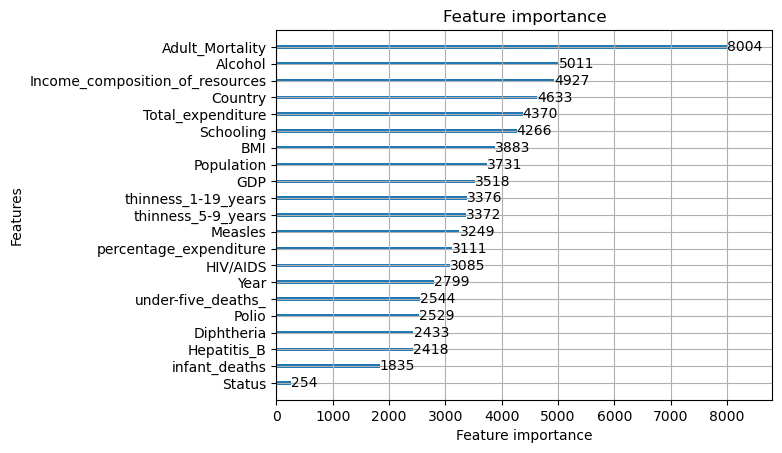

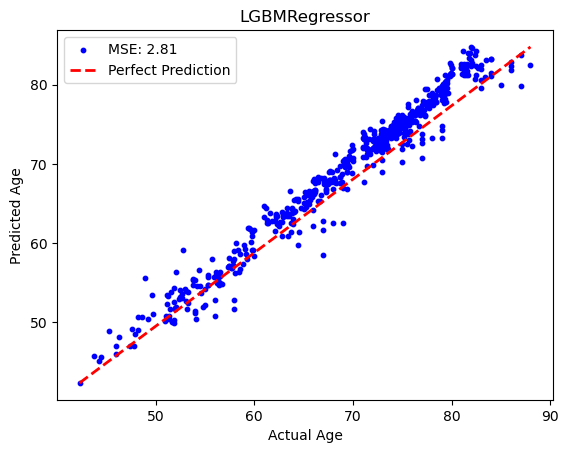

In [15]:
lgb, X_train, X_test = lgbm(df)

In [16]:
import shap
plt.figure(figsize=(10, 6))
explainer = shap.TreeExplainer(lgb)
shap_values = explainer(X_test)

IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html


<Figure size 1000x600 with 0 Axes>

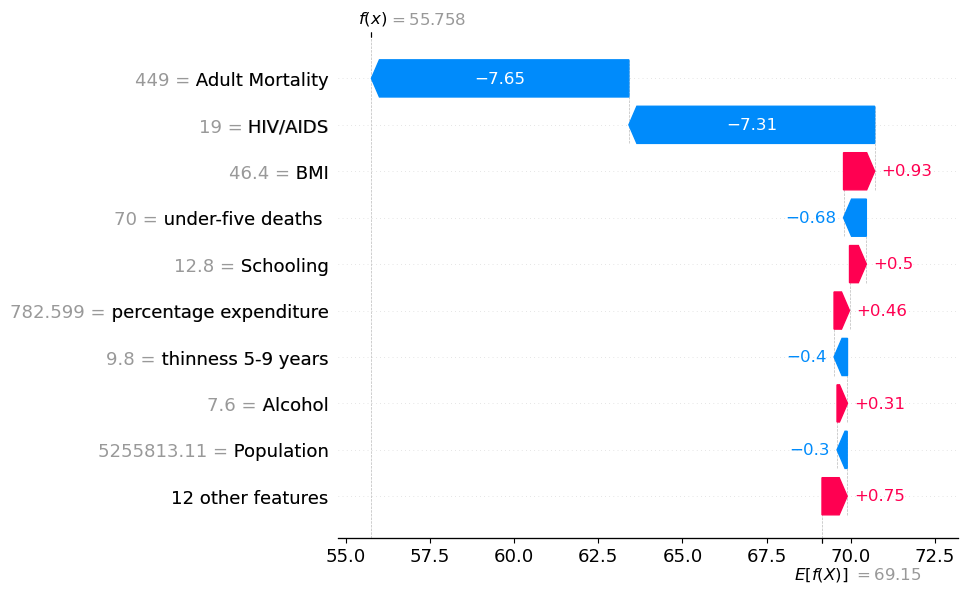

In [17]:
shap.plots.waterfall(shap_values[0])

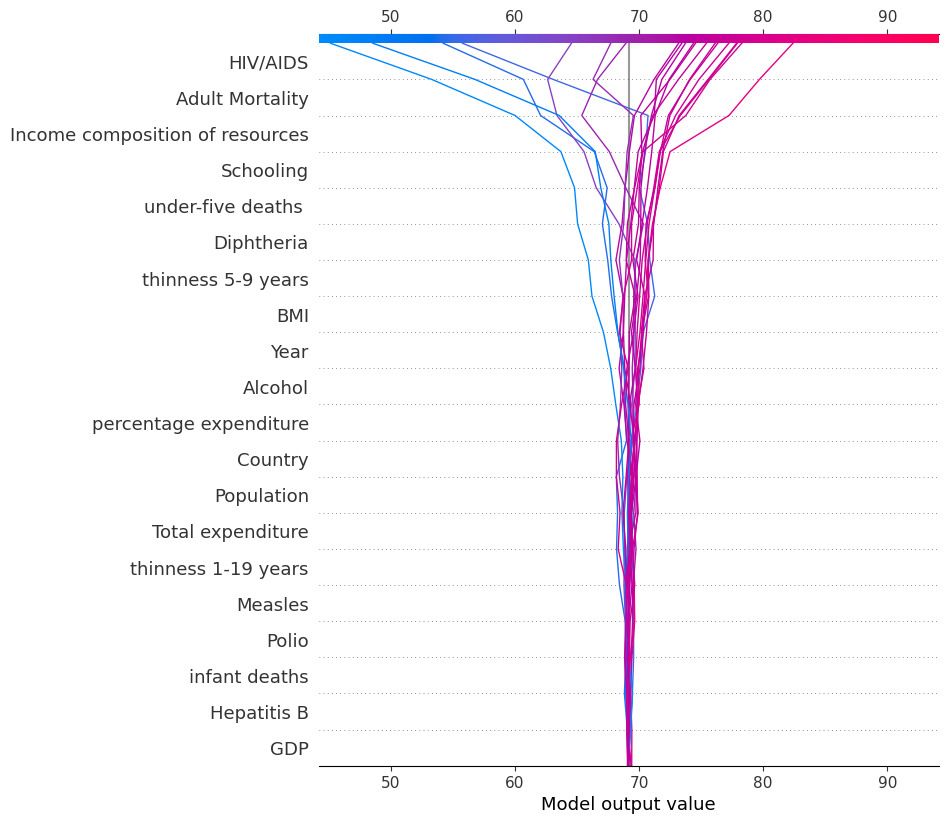

In [18]:
expected_value = explainer.expected_value
shap_array = explainer.shap_values(X_test)
shap.decision_plot(expected_value, shap_array[0:20], feature_names=list(X_test.columns))

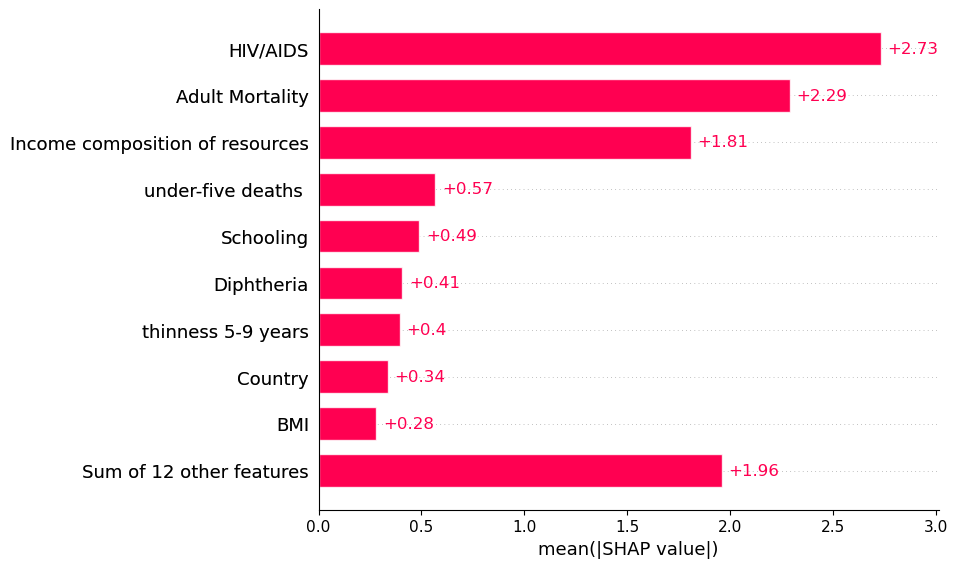

In [19]:
shap.plots.bar(shap_values)

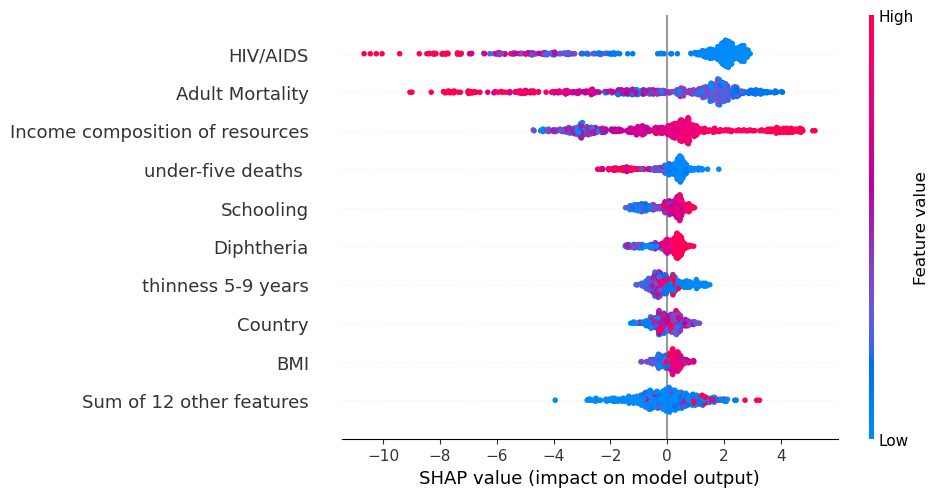

In [20]:
shap.plots.beeswarm(shap_values)